In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import j0
from scipy.integrate import quad

In [7]:
# Set the default font size for all text in the plot
plt.rcParams.update({'font.size': 20})

In [14]:
# Constants
G = 1  # Gravitational constant (set to 1 for simplicity)
Sigma0 = 1  # Central surface mass density
R0 = 1  # Characteristic radius

# Define the surface mass density function for the Mestel disk
def Sigma(R):
    return Sigma0 * R0 / R

# Compute f(k) using the Hankel transform of Sigma(R)
def f_k(k):
    # Integrate from R_min to R_max
    R_min = 0.01  # Avoid R = 0
    R_max = 50
    integrand = lambda R: Sigma(R) * j0(k * R) * R
    result, _ = quad(integrand, R_min, R_max, limit=1000)
    return -2 * np.pi * G * result

# Vectorize f_k for array inputs
f_k_vec = np.vectorize(f_k)

# Prepare k values for integration
k_values = np.linspace(0.01, 50, 500)  # Avoid k = 0 to prevent division by zero

# Precompute f(k) values
print("Computing f(k) values...")
f_k_values = f_k_vec(k_values)

# Create a grid in R and z
R_values = np.linspace(0.1, 15, 200)
z_values = np.linspace(-5, 5, 200)
R_grid, z_grid = np.meshgrid(R_values, z_values)

# Function to compute Phi at a point (R, z)
def Phi_point(R, z):
    integrand = f_k_values * j0(k_values * R) * np.exp(-k_values * np.abs(z))
    result = np.trapz(integrand, k_values)
    return result

# Vectorize Phi_point for array inputs
Phi_vec = np.vectorize(Phi_point)

# Compute Phi on the grid
print("Computing potential grid...")
Phi_grid = Phi_vec(R_grid, z_grid)

Computing f(k) values...
Computing potential grid...


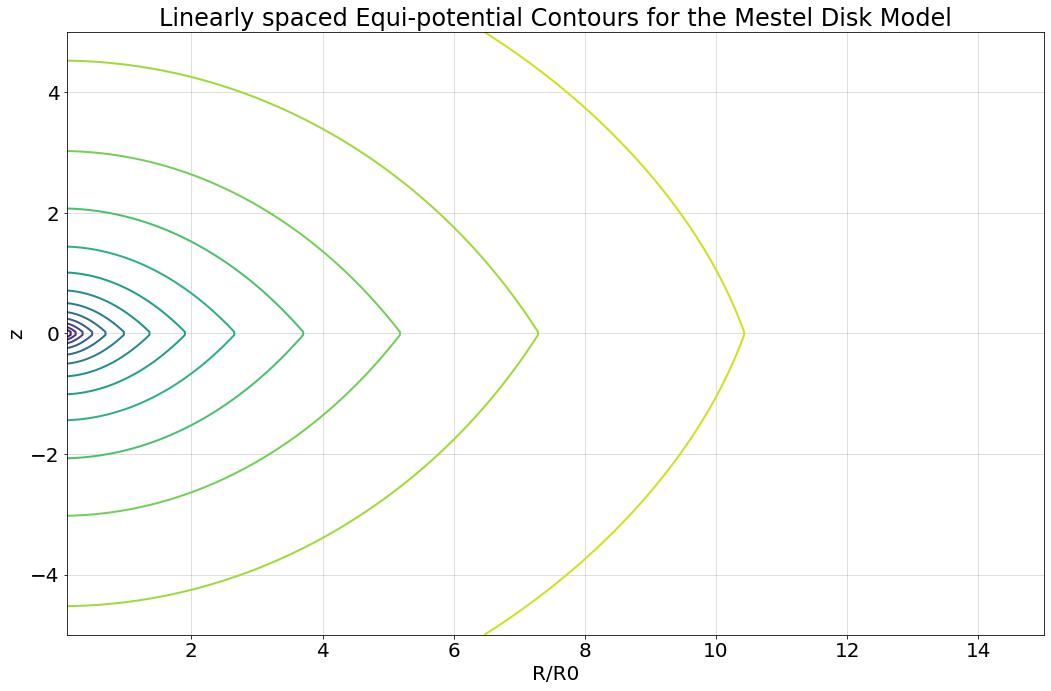

In [17]:
# Plot equipotential contours
plt.figure(figsize=(15, 10))
contour_levels = np.linspace(np.min(Phi_grid), np.max(Phi_grid), 15)
contour = plt.contour(R_grid/R0, z_grid, Phi_grid, levels=contour_levels, cmap='viridis', linewidths = 2)

plt.title('Linearly spaced Equi-potential Contours for the Mestel Disk Model')
plt.xlabel('R/R0')
plt.ylabel('z')

plt.grid(True)
plt.grid(visible=True, color='grey', alpha=0.5, linewidth=0.5)

plt.tight_layout()
plt.savefig("../Figures/mestel_disk.png", format="png", 
            dpi=300, transparent=False, facecolor='white', bbox_inches='tight')

plt.show()